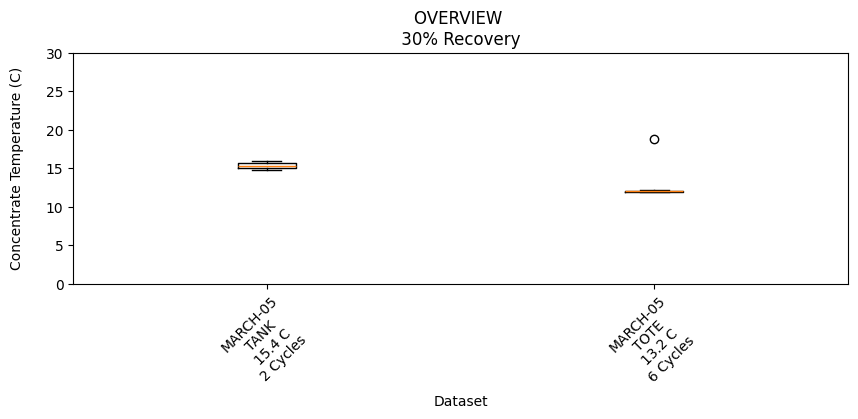

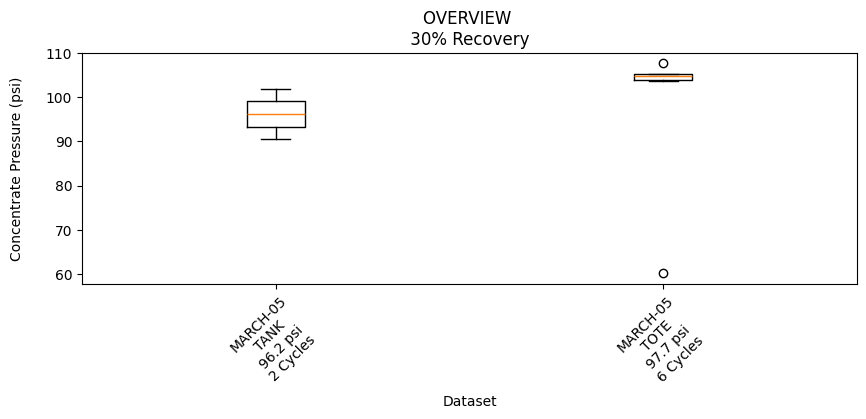

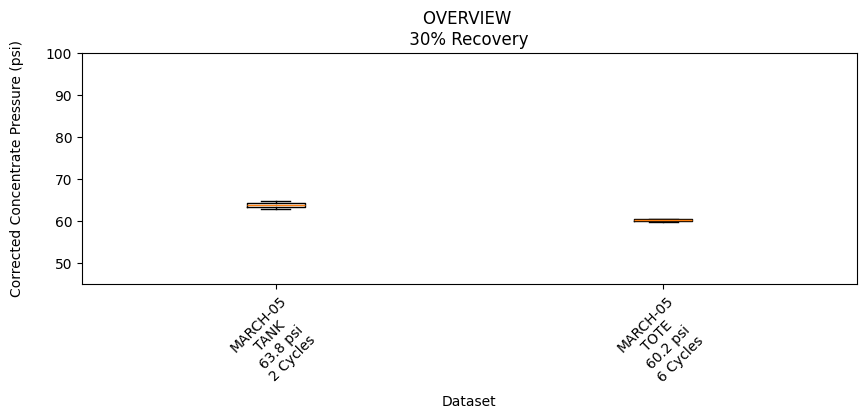

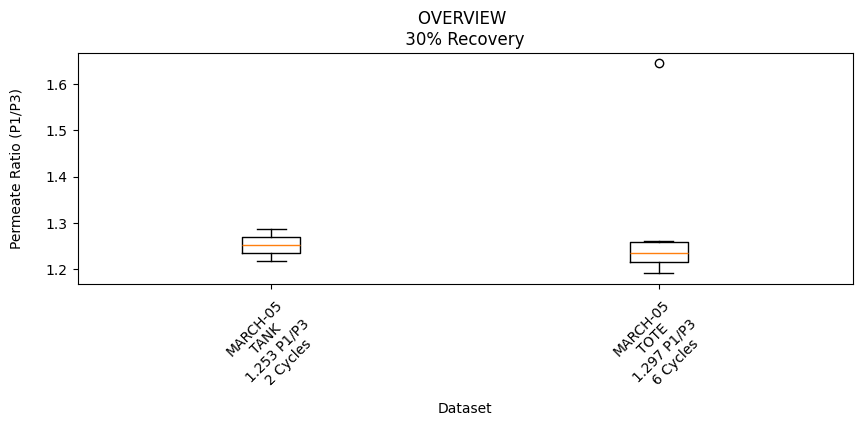

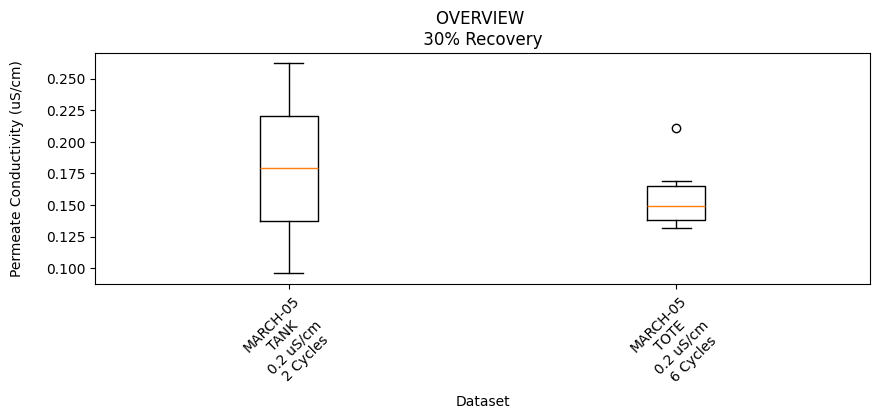

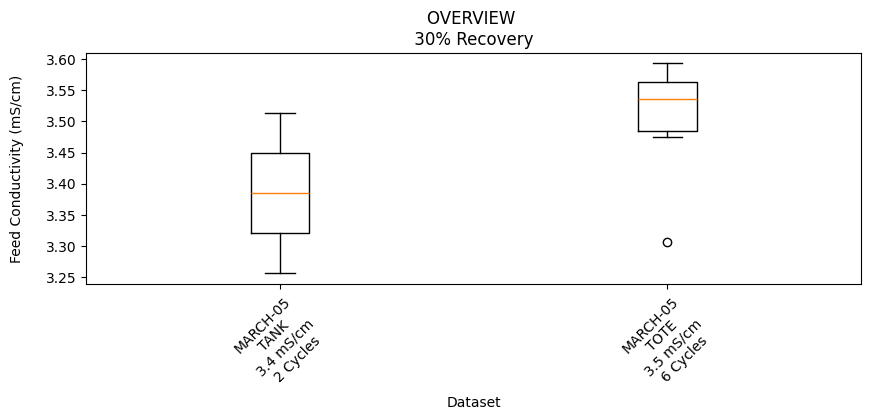

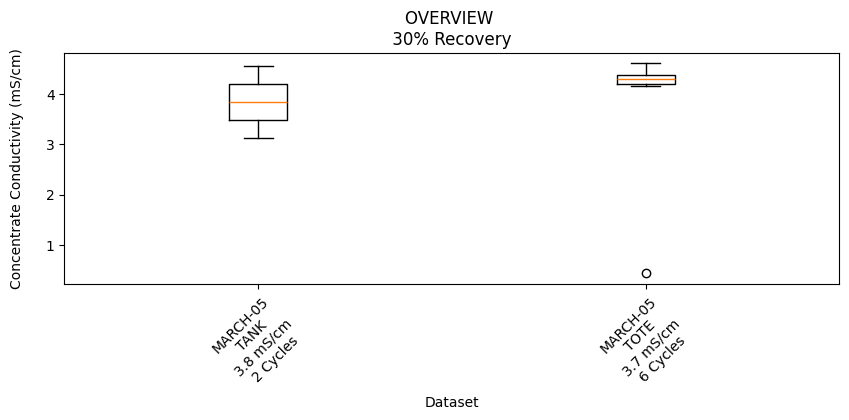

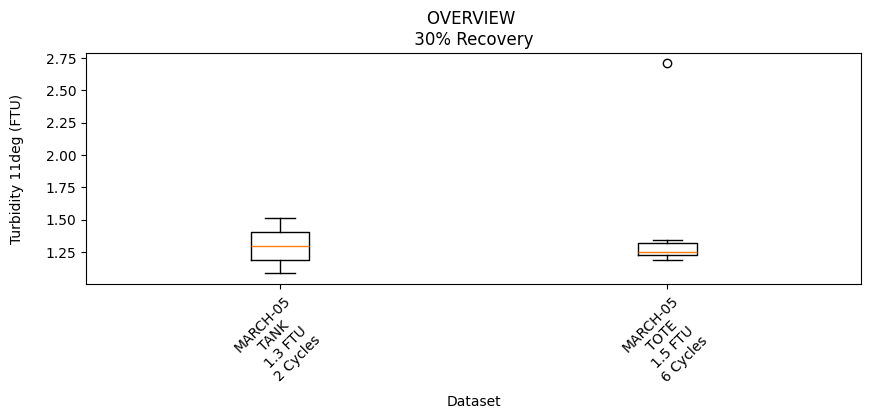

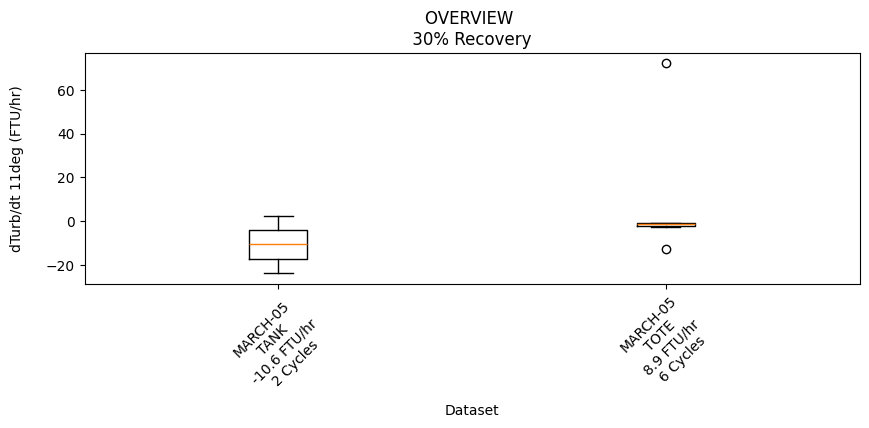

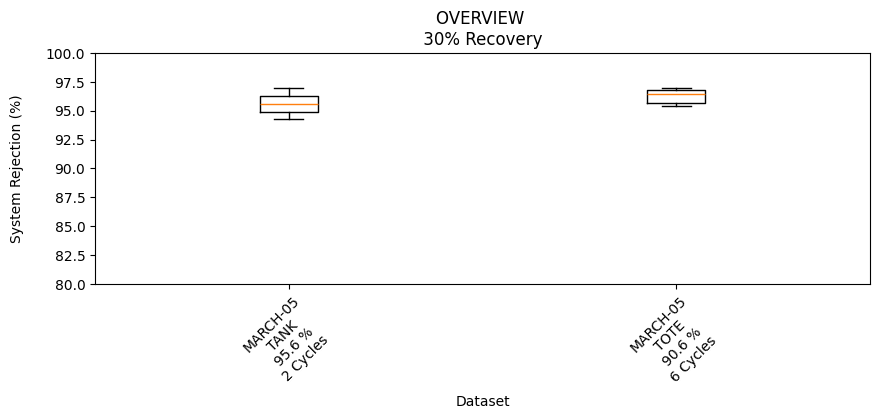

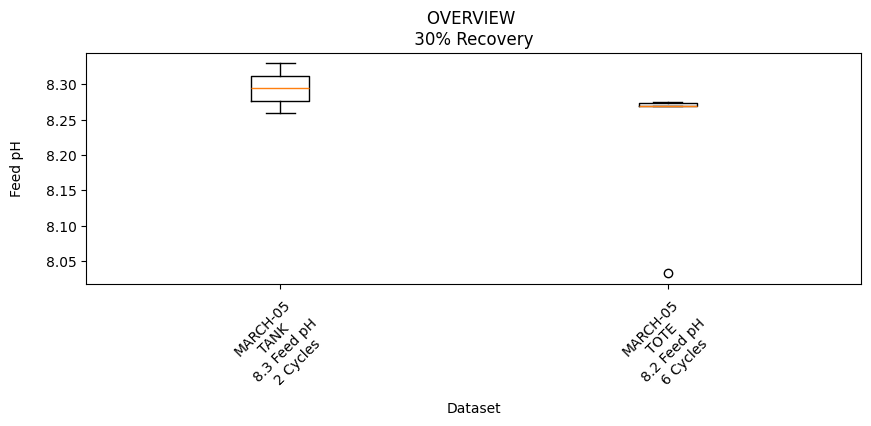

In [1]:
import matplotlib.pyplot as pyplot
import integrity, misc


# Specify the input channel for analysis
channels = [
    'Concentrate Temperature (C)',
    'Concentrate Pressure (psi)',
    'Corrected Concentrate Pressure (psi)',
    'Permeate Ratio (P1/P3)',
    'Permeate Conductivity (uS/cm)', 
    'Feed Conductivity (mS/cm)',
    'Concentrate Conductivity (mS/cm)',
    "Turbidity 11deg (FTU)",
    "dTurb/dt 11deg (FTU/hr)",
    "System Rejection (%)",
    "Feed pH"
]
limits = {'Corrected Concentrate Pressure (psi)':(45,100), 
          'System Rejection (%)':(80,100),
          'Concentrate Temperature (C)':(0,30)}
resolution={'Permeate Ratio (P1/P3)':3}
recovery = 30

site = 'DDP-LANE-A'#'AWTP'#'DATA'

experiment_summaries, experiment_names, datasets, all_cycles = integrity.calculate_statistics(
    channels,site=site,recovery=recovery, 
    conductivity_compensation=True, 
    temperature_compensation=True)

for channel in channels:

    summaries = list()
    experiment_lengths = list()
    for i, experiment_summary in enumerate(experiment_summaries):

        cycles = all_cycles[experiment_names[i]]
        experiment_lengths.append(len(cycles))

        summaries.append(experiment_summary[channel])

    fig, ax = pyplot.subplots(figsize=(10, 3))

    names = misc.format_names(experiment_names)
    tick_labels = list()
    for i, summary in enumerate(summaries):
        tick_labels.append(f"{names[i]}\n{round(summary.mean(),1 if channel not in resolution else resolution[channel])} {misc.extract_units(channel)}\n{experiment_lengths[i]} Cycle{'s' if experiment_lengths[i]>1 else ''}")

    ax.boxplot(summaries, tick_labels=tick_labels)

    ax.set_title(f"OVERVIEW \n {recovery}% Recovery ")
    ax.set_xlabel('Dataset')
    ax.set_ylabel(f'{channel}\n')


    if channel in limits:
        pyplot.ylim(limits[channel])
    pyplot.xticks(rotation=45)
    pyplot.show()

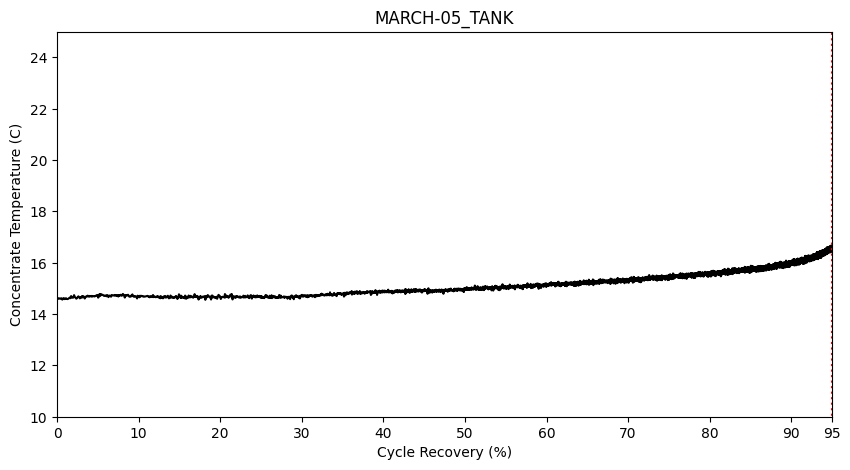

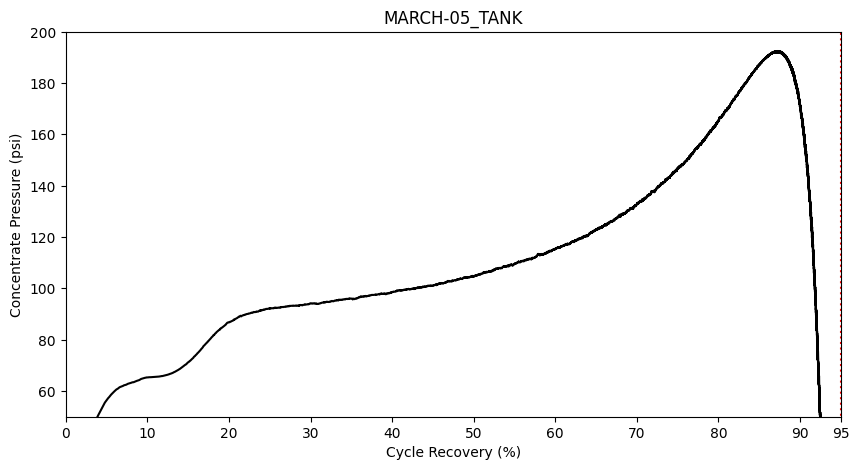

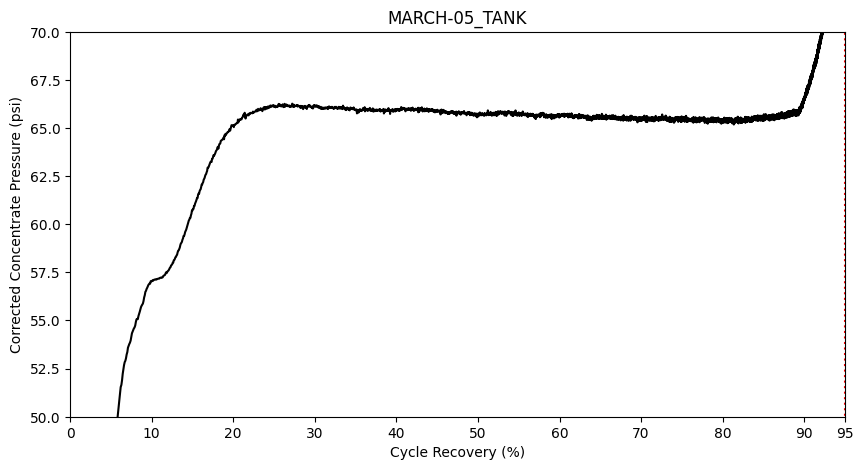

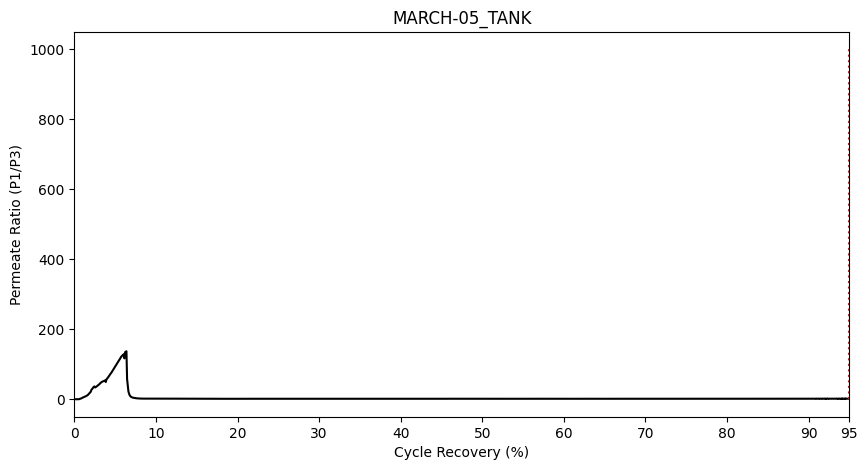

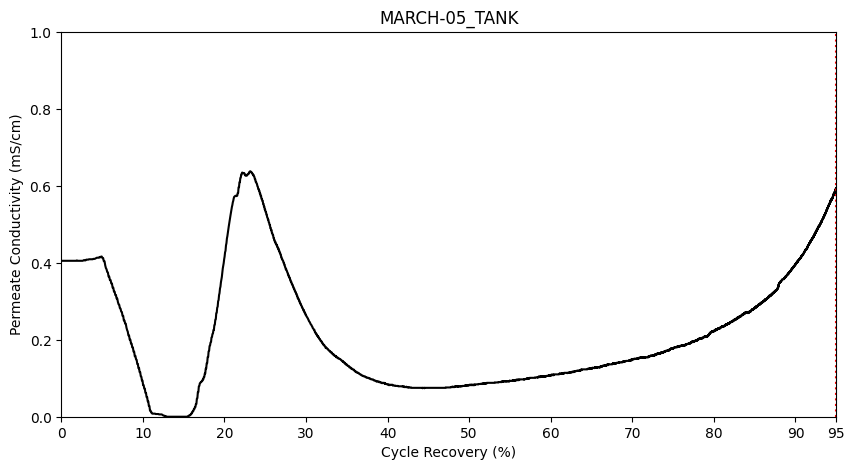

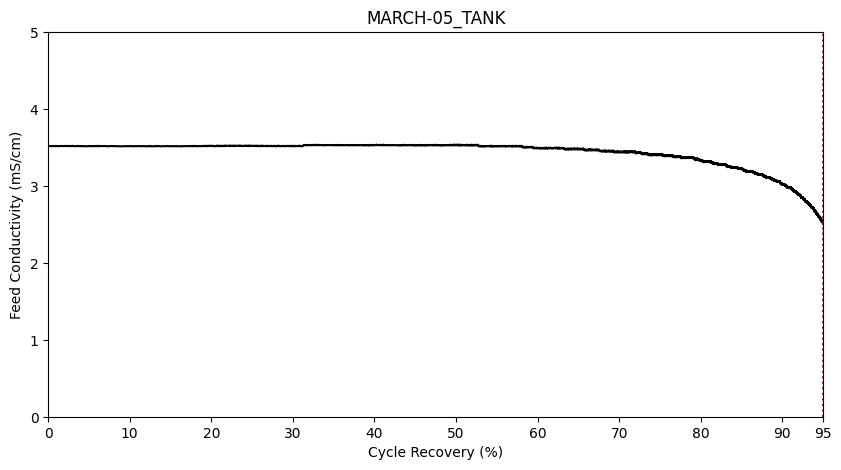

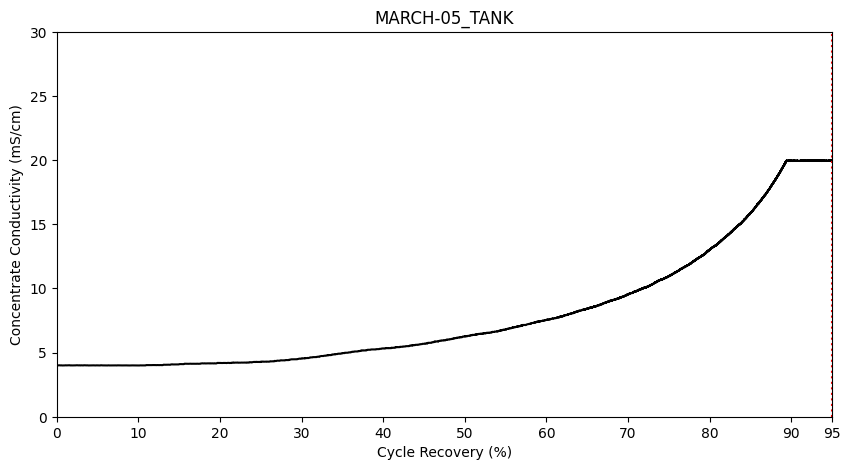

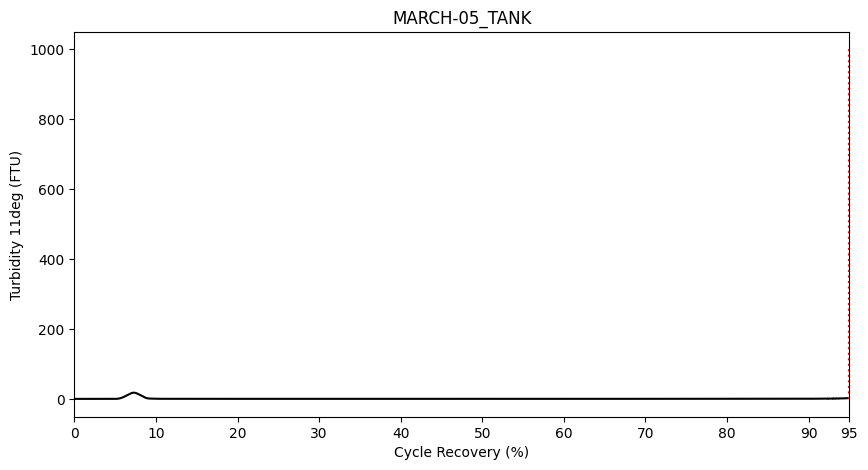

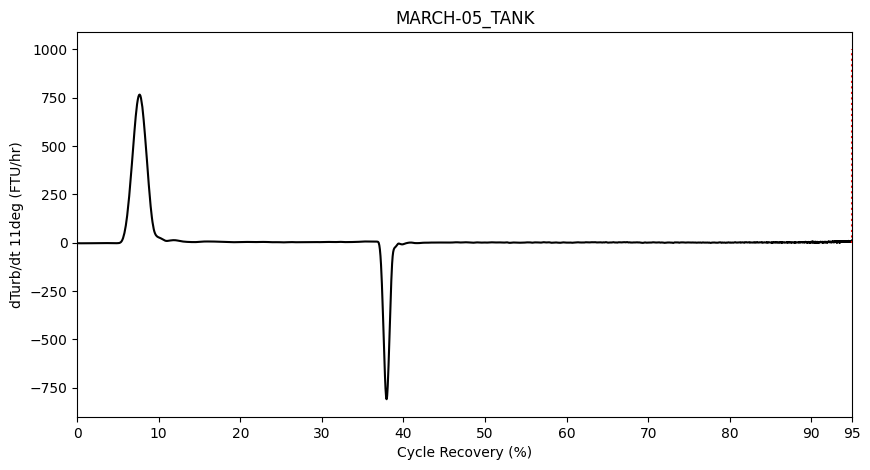

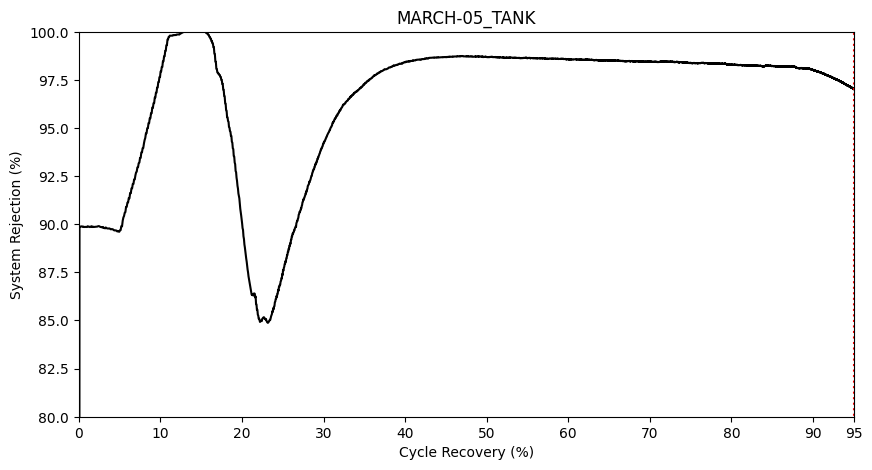

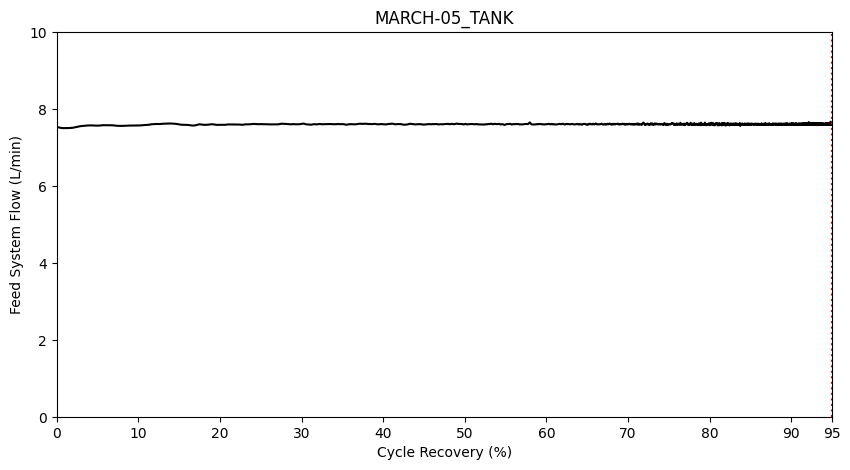

KeyError: 'Feed pHConcentrate Flow CCD (L/min)'

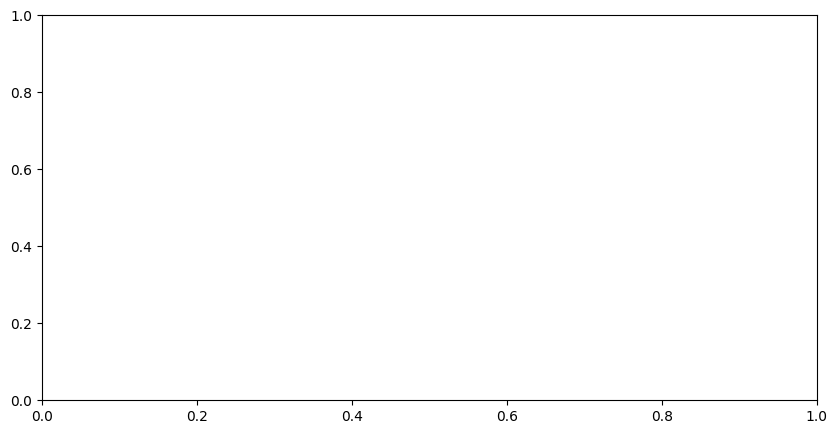

In [ ]:
import numpy, postprocessing

min_cycles = 0
exclude = [0]

cycle['Permeate Flow (L/min)']

channels = ['Concentrate Temperature (C)',
            'Concentrate Pressure (psi)',
            'Corrected Concentrate Pressure (psi)',
            'Permeate Ratio (P1/P3)',
            'Permeate Conductivity (mS/cm)', 
            'Feed Conductivity (mS/cm)',
            'Concentrate Conductivity (mS/cm)',
            "Turbidity 11deg (FTU)",
            "dTurb/dt 11deg (FTU/hr)",
            "System Rejection (%)",
            "Feed System Flow (L/min)",
            "Feed pH",
            'Concentrate Flow CCD (L/min)',
            'Permeate Flow (L/min)'

]

xlims = {
    'Concentrate Temperature (C)':(10,25),
    'Concentrate Pressure (psi)':(50,200),
    'Corrected Concentrate Pressure (psi)':(50,70),
    'Feed System Flow (L/min)':(0,10),
    'Concentrate Flow CCD (L/min)':(0,30),
    'Permeate Flow (L/min)':(0,10),
    'Feed pH':(3,10),
    'System Rejection (%)':(80,100),
    'Feed Conductivity (mS/cm)':(0,5),
    'Concentrate Conductivity (mS/cm)':(0,30),
    'Permeate Conductivity (mS/cm)':(0,1)
    

}

x_axis = ['Relative Minutes','Cycle Recovery (%)'][1]

for experiment_name in experiment_names:
    
        cycles = all_cycles[experiment_name]

        if len(cycles)<min_cycles:
            continue

        max_x = list()

        # Define the colormap and number of cycles to plot 
        from matplotlib import cm
        colormap = cm.Greys
        cycles_to_plot = cycles 
        num_cycles = len(cycles_to_plot)
        colors = colormap(numpy.linspace(0, 1, num_cycles))  # Generate colors

        for j, channel in enumerate(channels):

            fig, ax1 = pyplot.subplots(figsize=(10,5))
            
            for i, cycle in enumerate(cycles):

                if i in exclude:
                    continue

                x = cycle[x_axis]
                y = cycle[channel]

                if not (round(max(x)) in max_x):
                    max_x.append(round(max(x)))

                if 'Pressure' in channel:
                    y = postprocessing.temperature_pressure_correction(cycle['Concentrate Temperature (C)'],y)


                pyplot.plot(x,y, color = colors[i])

            if channel in xlims:
                pyplot.ylim(xlims[channel][0],xlims[channel][1])

            for i in max_x:
                pyplot.plot([i,i],[0,1000],':r')

            pyplot.xlim(0,max(max_x))
            pyplot.xticks([i for i in range(0,100,10)]+max_x)
            pyplot.ylabel(channel)
            pyplot.xlabel(x_axis)
            pyplot.title(experiment_name)
            #pyplot.legend()
            pyplot.show()



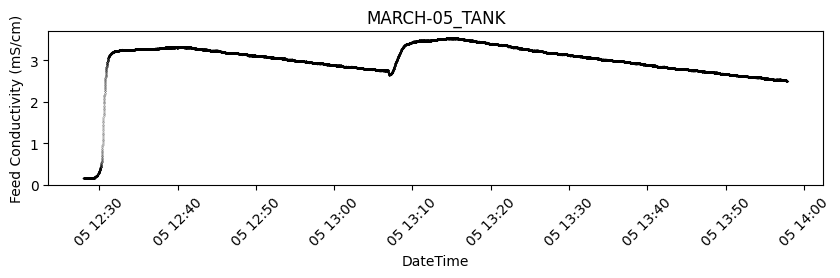

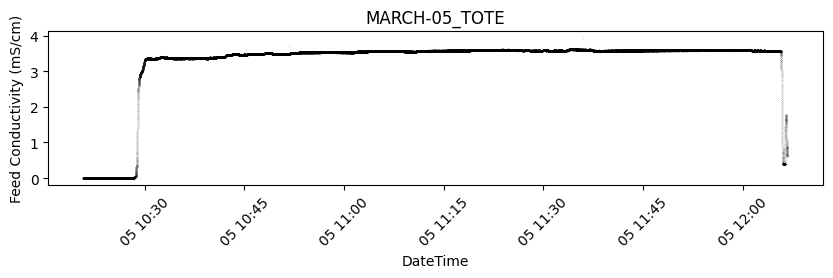

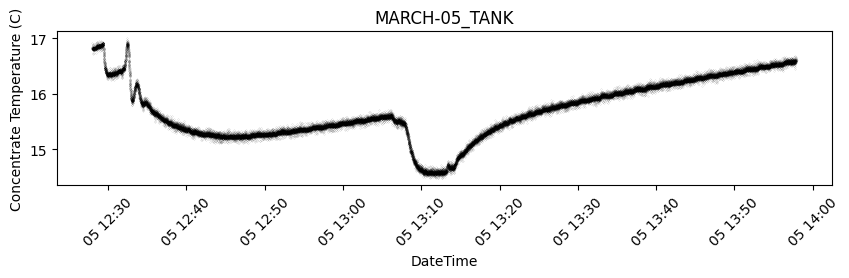

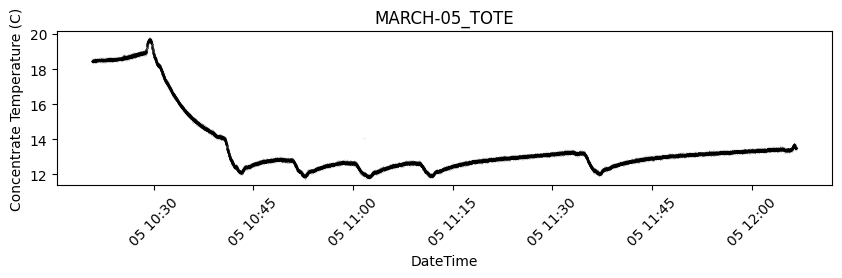

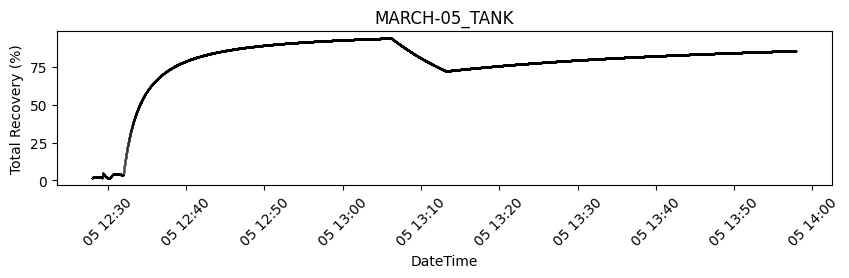

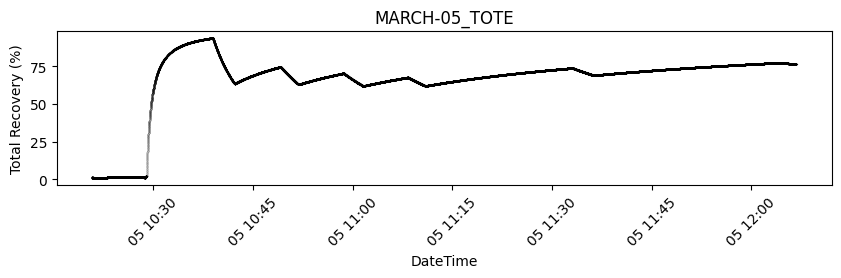

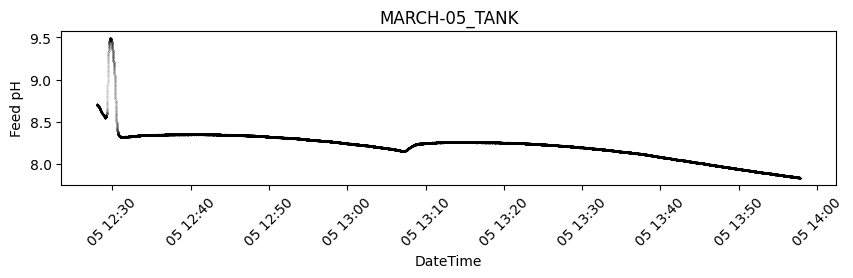

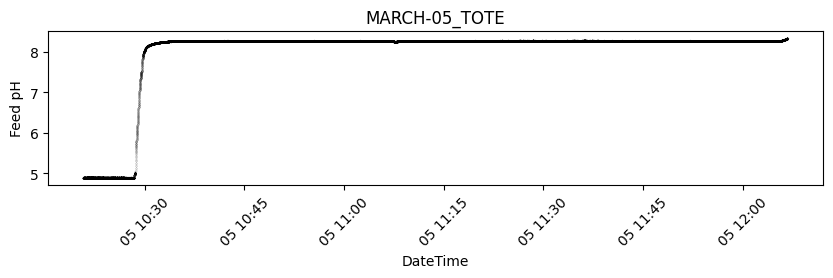

In [3]:
data_channels = [
    "Feed Conductivity (mS/cm)",
    'Concentrate Temperature (C)',
    "Total Recovery (%)",
    #"Max Cycle Recovery (%)",
    #"Feed Flow (L/min)",
    "Feed pH"
]





for data_channel in data_channels:
    for experiment_name in experiment_names:

        time_channel = "DateTime"#"Elapsed Time (hr)"

        y = datasets[experiment_name][data_channel]
        x = datasets[experiment_name][time_channel]

        pyplot.figure(figsize=(10,2))
        pyplot.plot(x,y,'.k', markersize=0.1)
        #pyplot.ylim(75,95)
        pyplot.title(experiment_name)
        pyplot.xlabel(time_channel)
        pyplot.ylabel(data_channel)
        pyplot.xticks(rotation=45)
        
        pyplot.show()

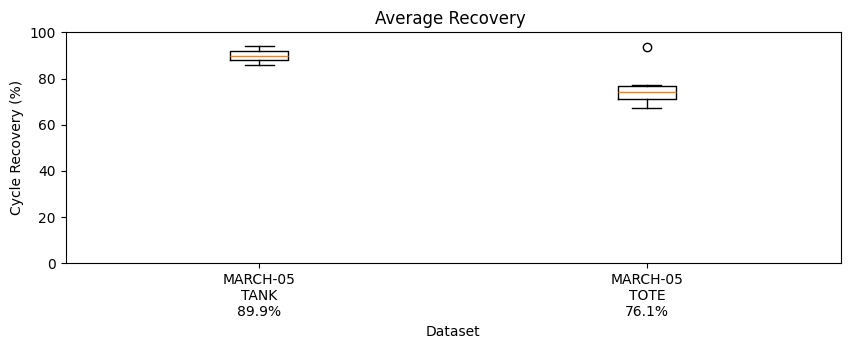

In [4]:
all_recoveries = list()
average_recoveries = list()
for experiment_name in experiment_names:
    cycles = all_cycles[experiment_name]

    experiment_recoveries = list()
    sum_recovery = 0
    for cycle in cycles:
        r = cycle["Total Recovery (%)"].max()
        experiment_recoveries.append(r)
        sum_recovery+=r
    average_recoveries.append(round(sum_recovery/len(cycles),1))

    all_recoveries.append(experiment_recoveries)
    
fig, ax = pyplot.subplots(figsize=(10, 3))

names = misc.format_names(experiment_names)
tick_labels = list()
for i, experiment_recoveries in enumerate(all_recoveries):
    tick_labels.append(f"{names[i]}\n{average_recoveries[i]}%")

ax.boxplot(all_recoveries, tick_labels=tick_labels)

ax.set_title(f"Average Recovery ")
ax.set_xlabel('Dataset')
ax.set_ylabel(f'Cycle Recovery (%)')
ax.set_ylim(0,100)


if channel in limits:
    pyplot.ylim(limits[channel])
#pyplot.xticks(rotation=45)
pyplot.show()

In [5]:
for dataset in datasets:
    print(dataset)
    print(datasets[dataset]["Total Recovery (%)"].iloc[-1],'%')
    print(round(datasets[dataset]["Runtime (hr)"].iloc[-1]),'hours')

MARCH-05_TANK
85.733 %
2 hours
MARCH-05_TOTE
76.191 %
2 hours


In [6]:
import numpy, postprocessing

target_recovery = 30

min_cycles = 10
exclude = [0,1,2]

channels = [
    
            'Corrected Concentrate Pressure (psi)',
            'Concentrate Conductivity (mS/cm)'
]
x_axis = ['Relative Minutes','Cycle Recovery (%)'][1]


for experiment_name in experiment_names:
    cycles = all_cycles[experiment_name]

    if len(cycles)<min_cycles:
        continue

    # Define the colormap and number of cycles to plot 
    from matplotlib import cm
    colormap = cm.viridis
    cycles_to_plot = cycles 
    num_cycles = len(cycles_to_plot)
    colors = colormap(numpy.linspace(0, 1, num_cycles))  # Generate colors

    for j, channel in enumerate(channels):

        fig, ax1 = pyplot.subplots(figsize=(10,5))
        
        for i, cycle in enumerate(cycles):

            if i in exclude:
                continue

            x = cycle[x_axis]
            y = cycle[channel]

            if 'Pressure' in channel:
                y = postprocessing.temperature_pressure_correction(cycle['Concentrate Temperature (C)'],y)


            pyplot.plot(x,y, color = colors[i])

        #pyplot.ylim(55,75)
        #pyplot.xlim(0,55)
        pyplot.ylabel(channel)
        pyplot.xlabel(x_axis)
        pyplot.title(experiment_name)
        #pyplot.legend()
        pyplot.show()



MARCH-05_TANK Corrected Concentrate Pressure (psi) Spread: 61.407 to 61.407 => diff 0.0
MARCH-05_TOTE Corrected Concentrate Pressure (psi) Spread: 58.863 to 59.492 => diff 0.629


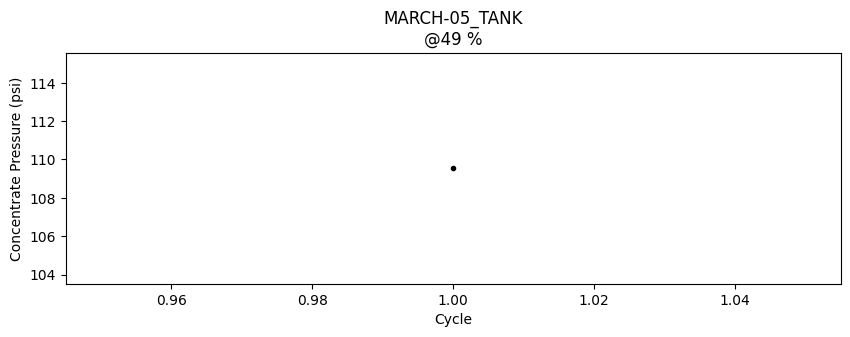

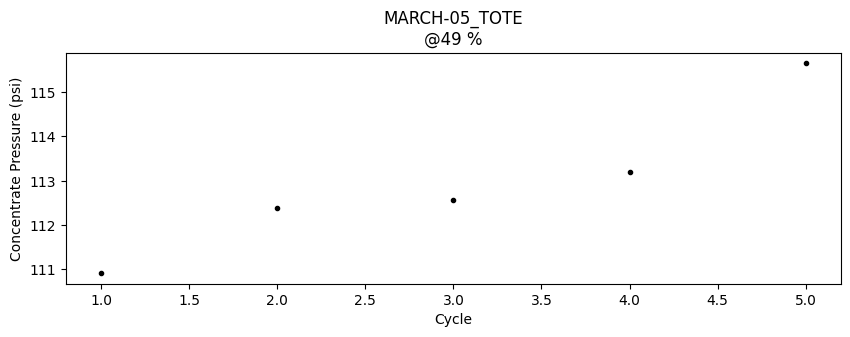

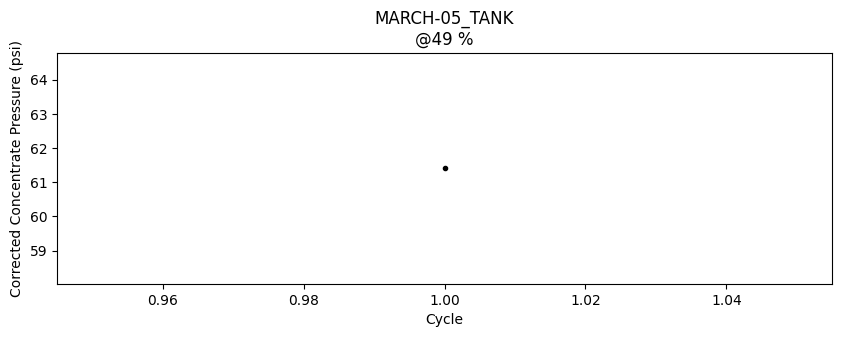

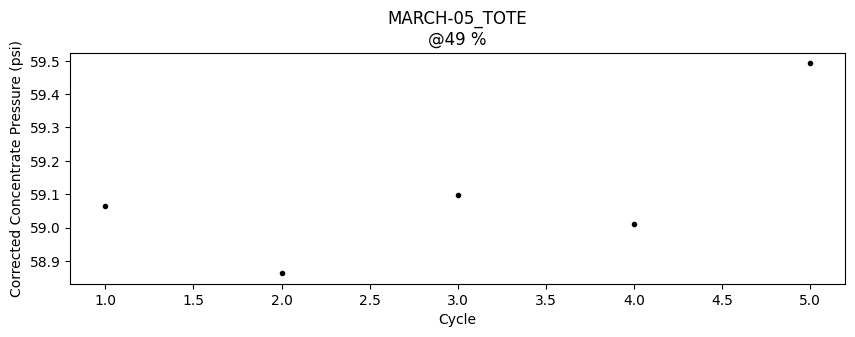

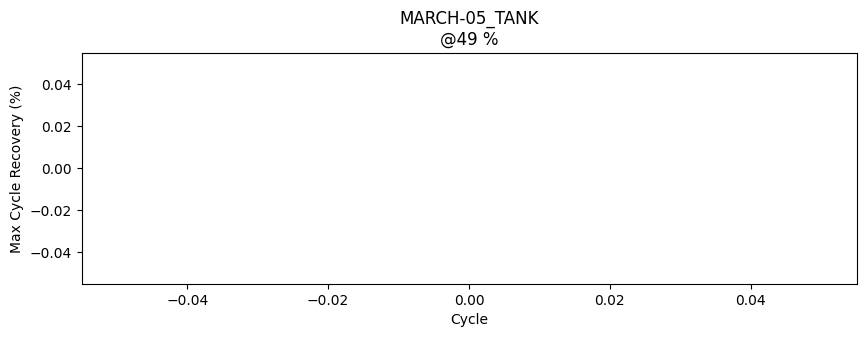

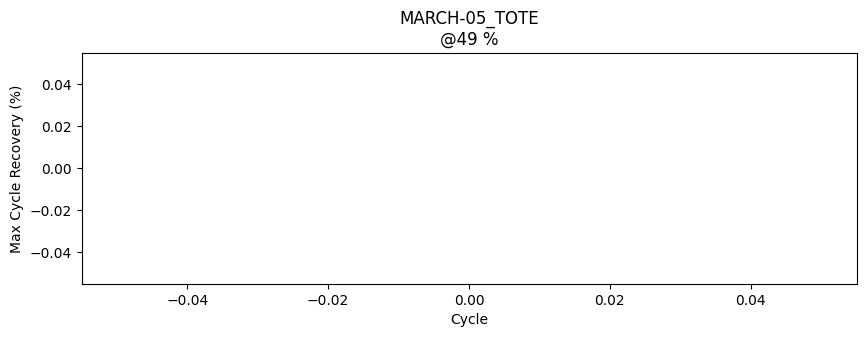

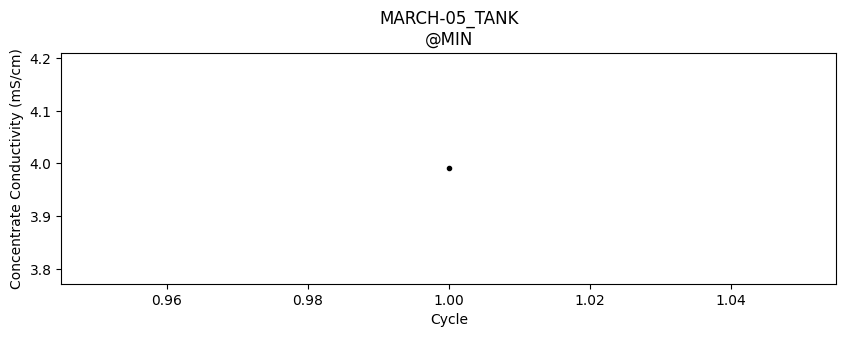

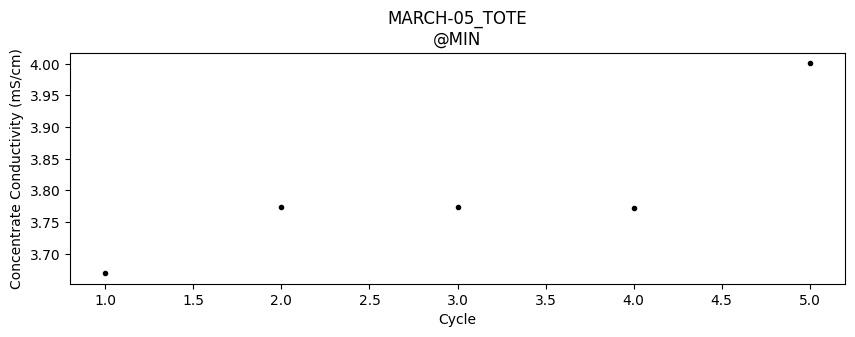

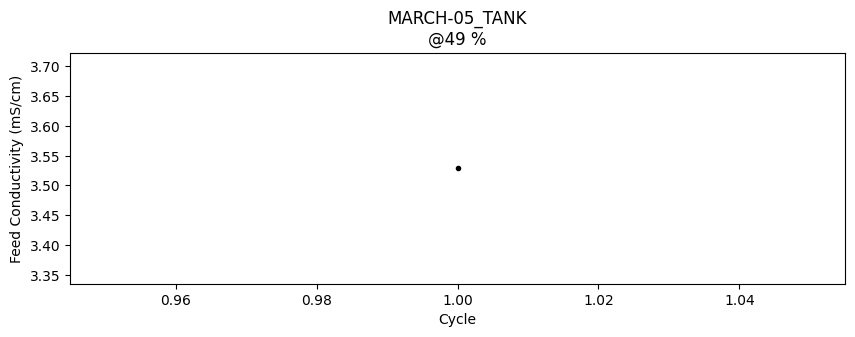

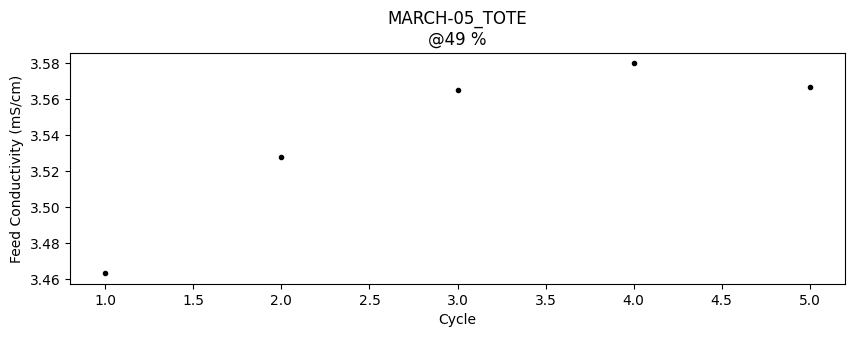

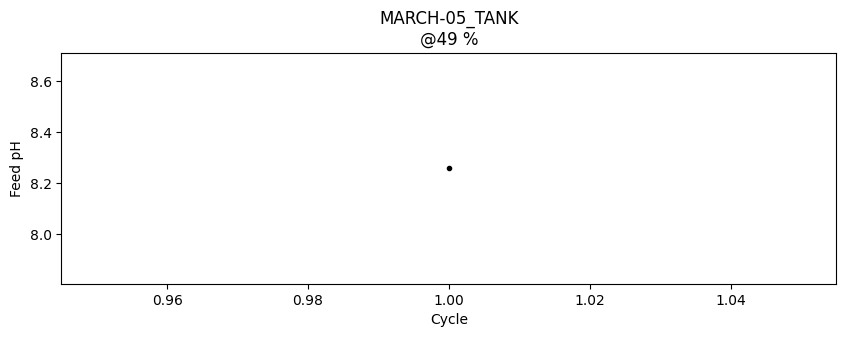

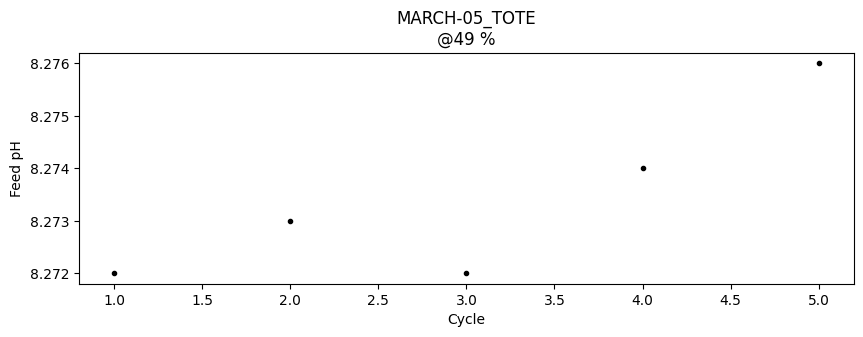

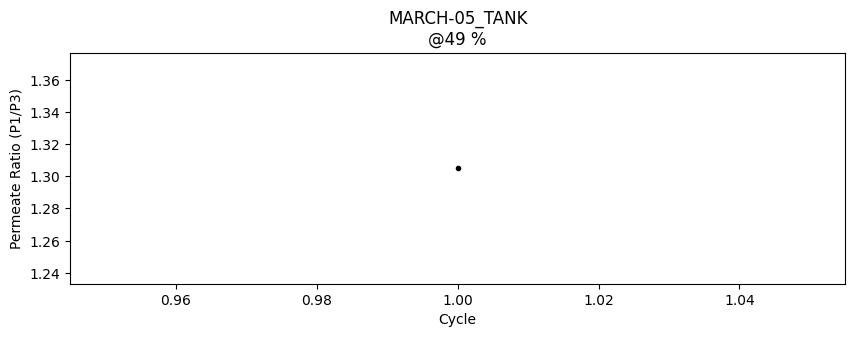

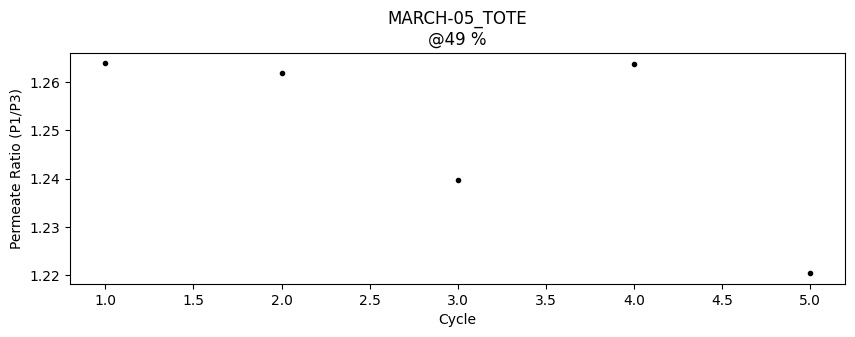

In [7]:
target_recovery = 49

exclude = [0]


channels = [
    'Concentrate Pressure (psi)',
    'Corrected Concentrate Pressure (psi)',
    'Max Cycle Recovery (%)',
    'Concentrate Conductivity (mS/cm)',
    'Feed Conductivity (mS/cm)',
    'Feed pH',
    'Permeate Ratio (P1/P3)'
    ]

skips = 6
cycle_shift = 0

special_case = 'Max Cycle Recovery (%)'
cond = 'Concentrate Conductivity (mS/cm)'

for channel in channels:
    for experiment_name in experiment_names:
        title = f"{experiment_name}\n@{target_recovery} %"

        cycles = all_cycles[experiment_name]

        # Initialize an empty list to store datapoints for the current channel
        points_y = list()
        points_x = list()

        trigger_y = list()
        trigger_x = list()

        # Process each cycle in the experiment, gathering data at specified conditions
        for i, cycle in enumerate(cycles):
            # Skip cycles marked for exclusion

            if channel == special_case:
                i-=1
                if i == -1:
                    continue
            


            if i in exclude:
                continue
            else:
                try:
                    # Extract the first datapoint for the target channel where Cycle Recovery is at least 30%
                    point = cycle[cycle['Cycle Recovery (%)'] >= target_recovery].iloc[0][channel]

                    if channel == cond:
                        point = cycle['Concentrate Conductivity (mS/cm)'].min()
                        title = f"{experiment_name}\n@MIN"

                    # Append the datapoint to the channel's list
                    points_y.append(point)
                    points_x.append(i)

                    if (i+cycle_shift)%skips == 0:
                        trigger_x.append(i)
                        trigger_y.append(point)
                except:
                    pass

        pyplot.figure(figsize=(10,3))
        pyplot.plot(points_x,points_y,'.k')
        pyplot.plot(trigger_x,trigger_y,'.r')
        pyplot.title(title)
        pyplot.xlabel("Cycle")
        pyplot.ylabel(channel)
        #pyplot.ylim(45,50)

        

        if channel == 'Corrected Concentrate Pressure (psi)':
            maximum = round(max(points_y),3)
            minimum = round(min(points_y),3)
            print(f'{experiment_name} {channel} Spread: {minimum} to {maximum} => diff {round(maximum-minimum,3)}')

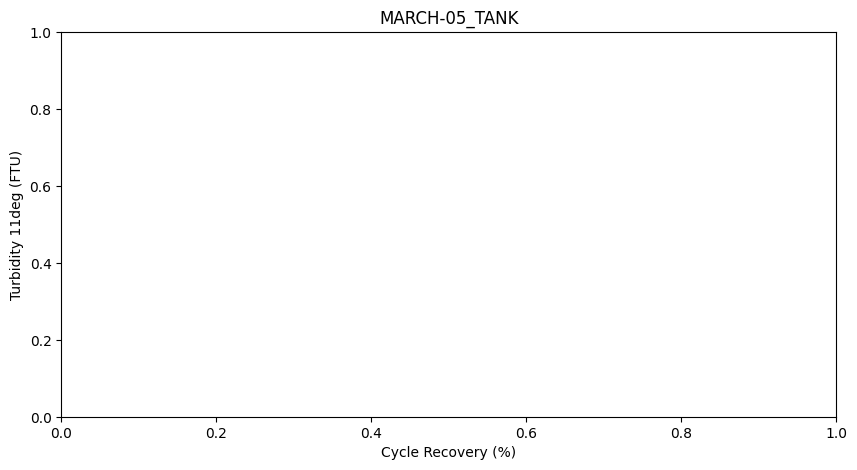

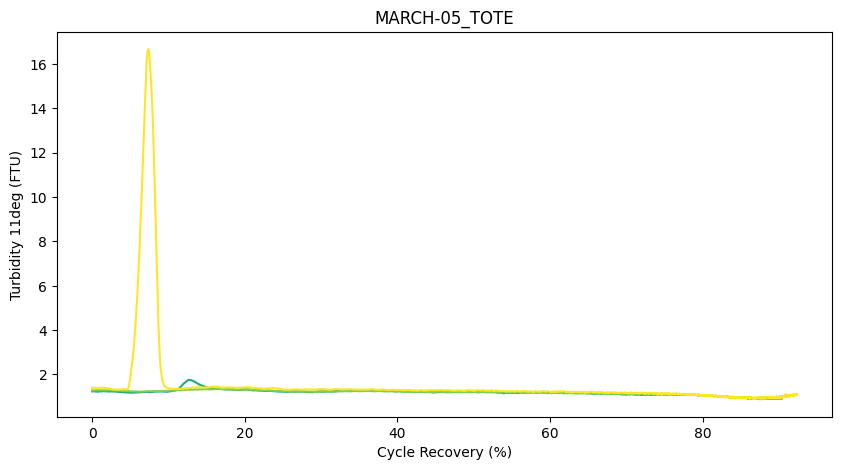

In [8]:
import numpy, postprocessing

target_recovery = 30

min_cycles = 1
exclude = [0,1,2]

channels = [
            'Turbidity 11deg (FTU)',
]
x_axis = ['Relative Minutes','Cycle Recovery (%)'][1]

for experiment_name in experiment_names:
    cycles = all_cycles[experiment_name]

    if len(cycles)<min_cycles:
        continue

    # Define the colormap and number of cycles to plot 
    from matplotlib import cm
    colormap = cm.viridis
    cycles_to_plot = cycles 
    num_cycles = len(cycles_to_plot)
    colors = colormap(numpy.linspace(0, 1, num_cycles))  # Generate colors

    for j, channel in enumerate(channels):

        fig, ax1 = pyplot.subplots(figsize=(10,5))
        
        for i, cycle in enumerate(cycles):

            if i in exclude:
                continue

            x = cycle[x_axis]
            y = cycle[channel]

            if 'Pressure' in channel:
                y = postprocessing.temperature_pressure_correction(cycle['Concentrate Temperature (C)'],y)


            pyplot.plot(x,y, color = colors[i])

        #pyplot.ylim(0.5,1)
        #pyplot.xlim(75,95)
        pyplot.ylabel(channel)
        pyplot.xlabel(x_axis)
        pyplot.title(experiment_name)
        #pyplot.legend()
        pyplot.show()



0
5


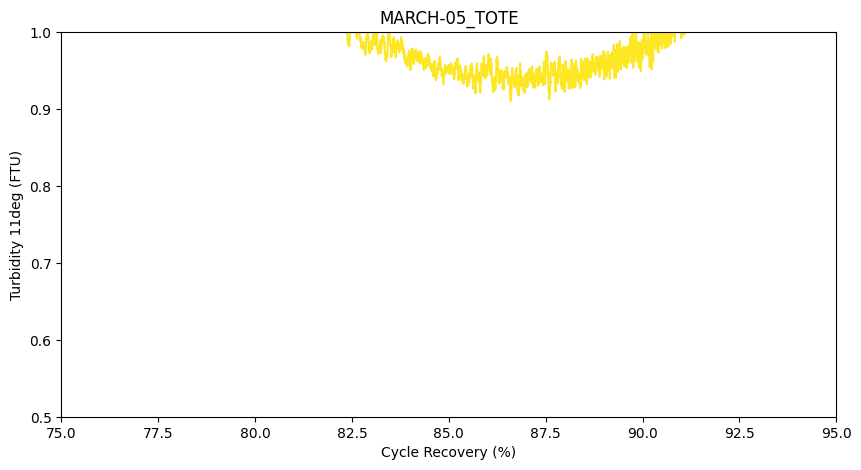

In [9]:
import numpy, postprocessing

target_recovery = 30

min_cycles = 5
#exclude = [0,1,2]
exclude = []
only_cycles = [0,5,10,15,20,25]

skips = 5

channels = [
            #"dTurb/dt 11deg (FTU/hr)",
            "Turbidity 11deg (FTU)"
]
x_axis = ['Relative Minutes','Cycle Recovery (%)'][1]

for experiment_name in experiment_names:
    cycles = all_cycles[experiment_name]

    if len(cycles)<min_cycles:
        continue

    # Define the colormap and number of cycles to plot 
    from matplotlib import cm
    colormap = cm.viridis
    cycles_to_plot = cycles 
    num_cycles = len(cycles_to_plot)
    colors = colormap(numpy.linspace(0, 1, num_cycles))  # Generate colors

    for j, channel in enumerate(channels):

        fig, ax1 = pyplot.subplots(figsize=(10,5))
        
        for i, cycle in enumerate(cycles):

            if i in exclude:
                continue
            if False:
                if (not (i in only_cycles)):
                    continue
            if True:
                if (i%skips)!=0:
                    continue
                else:
                    print(i)

            x = cycle[x_axis]
            y = cycle[channel]

            if 'Pressure' in channel:
                y = postprocessing.temperature_pressure_correction(cycle['Concentrate Temperature (C)'],y)


            pyplot.plot(x,y, color = colors[i])

        pyplot.ylim(0.5,1)
        pyplot.xlim(75,95)
        pyplot.ylabel(channel)
        pyplot.xlabel(x_axis)
        pyplot.title(experiment_name)
        #pyplot.legend()
        pyplot.show()



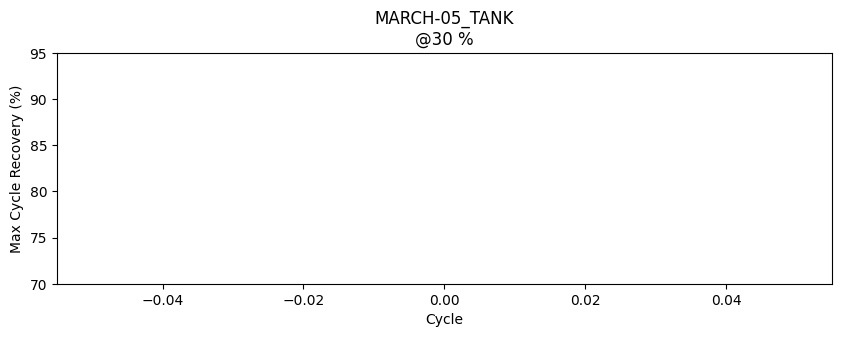

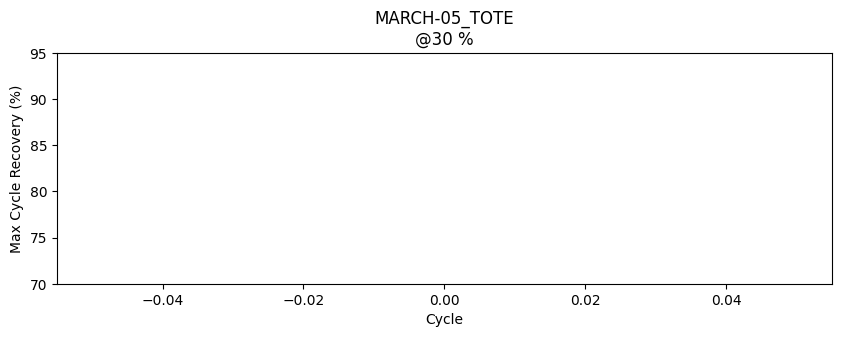

In [10]:
target_recovery = 30

channel = 'Max Cycle Recovery (%)'

for experiment_name in experiment_names:

    cycles = all_cycles[experiment_name]

    # Initialize an empty list to store datapoints for the current channel
    points_y = list()
    points_x = list()

    # Process each cycle in the experiment, gathering data at specified conditions
    for i, cycle in enumerate(cycles):
        # Skip cycles marked for exclusion
        if i in exclude:
            continue
        else:
            try:
                # Extract the first datapoint for the target channel where Cycle Recovery is at least 30%
                point = cycle[cycle['Cycle Recovery (%)'] >= target_recovery].iloc[0][channel]

                # Append the datapoint to the channel's list
                points_y.append(point)
                points_x.append(i)
            except:
                pass

    pyplot.figure(figsize=(10,3))
    pyplot.plot(points_x,points_y,'.k')
    pyplot.title(f"{experiment_name}\n@{target_recovery} %")
    pyplot.xlabel("Cycle")
    pyplot.ylabel(channel)
    pyplot.ylim(70,95)

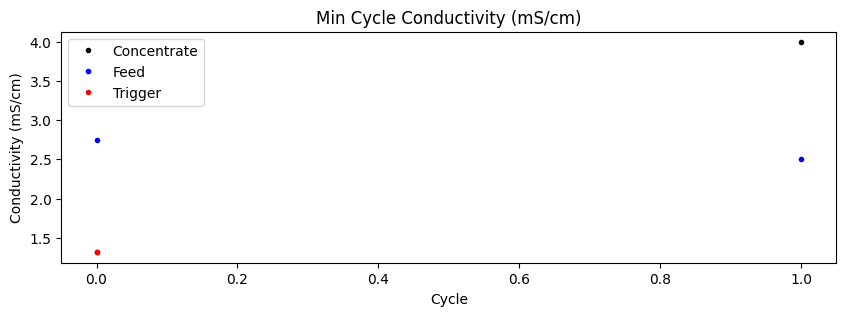

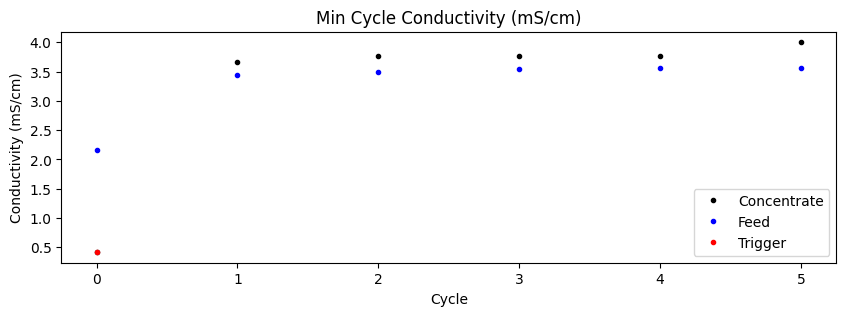

In [11]:
target_recovery = 70

exclude = []


channels = [
    'Concentrate Conductivity (mS/cm)',
    'Feed Conductivity (mS/cm)',
    ]

skips = 6
cycle_shift = 0

cond = 'Concentrate Conductivity (mS/cm)'


for experiment_name in experiment_names:
    title = f"{experiment_name}\n@{target_recovery} %"

    cycles = all_cycles[experiment_name]

    # Initialize an empty list to store datapoints for the current channel
    points_a_y = list()
    points_x = list()

    points_b_y = list()
    points_x = list()

    trigger_y = list()
    trigger_x = list()

    # Process each cycle in the experiment, gathering data at specified conditions
    for i, cycle in enumerate(cycles):
        # Skip cycles marked for exclusion

        if i in exclude:
            continue
        else:
            try:

                point_a = cycle['Concentrate Conductivity (mS/cm)'].min()
                point_b = cycle['Feed Conductivity (mS/cm)'].min()

                # Append the datapoint to the channel's list
                points_a_y.append(point_a)
                points_b_y.append(point_b)
                points_x.append(i)

                if (i+cycle_shift)%skips == 0:
                    trigger_x.append(i)
                    trigger_y.append(point_a)
            except:
                pass

    pyplot.figure(figsize=(10,3))
    pyplot.plot(points_x,points_a_y,'.k', label='Concentrate')
    pyplot.plot(points_x,points_b_y,'.b', label='Feed')
    
    pyplot.plot(trigger_x,trigger_y,'.r', label='Trigger')
    pyplot.title("Min Cycle Conductivity (mS/cm)")
    pyplot.xlabel("Cycle")
    pyplot.ylabel( "Conductivity (mS/cm)")
    pyplot.legend()
    #pyplot.ylim(45,50)

ValueError: x and y must have same first dimension, but have shapes (6,) and (8,)

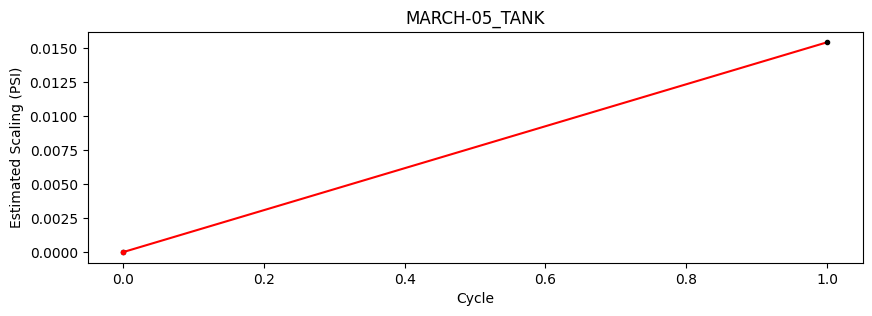

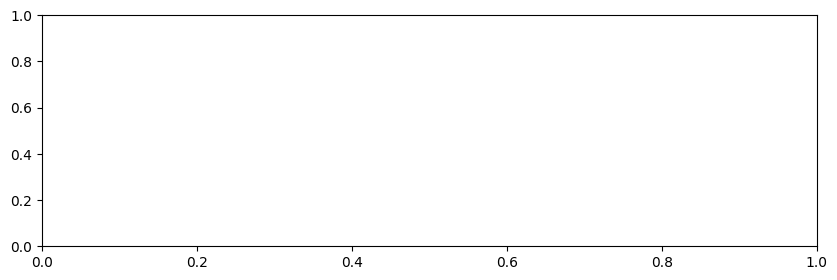

In [12]:
target_recovery = 70

exclude = []


last_pressure = 0
cumulative_scaling = 0
cumulate = list()

for experiment_name in experiment_names:
    title = f"{experiment_name}"

    cycles = all_cycles[experiment_name]

    # Initialize an empty list to store datapoints for the current channel
    points_y = list()
    points_x = list()

    trigger_y = list()
    trigger_x = list()

    # Process each cycle in the experiment, gathering data at specified conditions
    for i, cycle in enumerate(cycles):
        # Skip cycles marked for exclusion

       
        try:
            # Extract the first datapoint for the target channel where Cycle Recovery is at least 30%
            point = cycle[cycle['Cycle Recovery (%)'] >= target_recovery].iloc[0]['Corrected Concentrate Pressure (psi)']

            if last_pressure == 0:
                estimated_scaling = 0
            else:
                estimated_scaling = point-last_pressure
            last_pressure = point

            cumulative_scaling+=estimated_scaling
            cumulate.append(cumulative_scaling)

            # Append the datapoint to the channel's list
            points_y.append(estimated_scaling)
            points_x.append(i)

            if (i+cycle_shift)%skips == 0:
                trigger_x.append(i)
                trigger_y.append(estimated_scaling)
        except:
            pass

    pyplot.figure(figsize=(10,3))
    pyplot.plot(points_x, cumulate,'r')
    pyplot.plot(points_x,points_y,'.k')
    pyplot.plot(trigger_x,trigger_y,'.r')
    pyplot.title(title)
    pyplot.xlabel("Cycle")
    pyplot.ylabel("Estimated Scaling (PSI)")
    #pyplot.ylim(45,50)

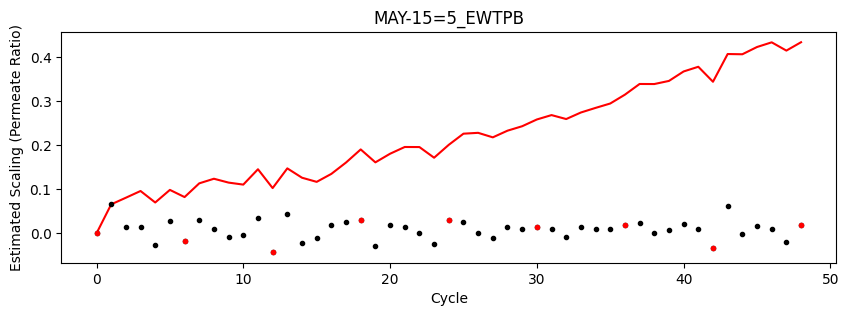

In [ ]:
target_recovery = 70

exclude = []


last_pressure = 0
cumulative_scaling = 0
cumulate = list()

for experiment_name in experiment_names:
    title = f"{experiment_name}"

    cycles = all_cycles[experiment_name]

    # Initialize an empty list to store datapoints for the current channel
    points_y = list()
    points_x = list()

    trigger_y = list()
    trigger_x = list()

    # Process each cycle in the experiment, gathering data at specified conditions
    for i, cycle in enumerate(cycles):
        # Skip cycles marked for exclusion

       
        try:
            point = cycle[cycle['Cycle Recovery (%)'] >= target_recovery].iloc[0]['Permeate Ratio (P1/P3)']

            if last_pressure == 0:
                estimated_scaling = 0
            else:
                estimated_scaling = point-last_pressure
            last_pressure = point

            cumulative_scaling+=estimated_scaling
            cumulate.append(cumulative_scaling)

            # Append the datapoint to the channel's list
            points_y.append(estimated_scaling)
            points_x.append(i)

            if (i+cycle_shift)%skips == 0:
                trigger_x.append(i)
                trigger_y.append(estimated_scaling)
        except:
            pass

    pyplot.figure(figsize=(10,3))
    pyplot.plot(points_x, cumulate,'r')
    pyplot.plot(points_x,points_y,'.k')
    pyplot.plot(trigger_x,trigger_y,'.r')
    pyplot.title(title)
    pyplot.xlabel("Cycle")
    pyplot.ylabel("Estimated Scaling (Permeate Ratio)")
    #pyplot.ylim(-1,1)